### Concrete is the backbone of our modern infrastructure, providing strength and durability to buildings, bridges, and other structures. Predicting the strength of concrete is crucial for ensuring safety, optimizing construction processes, and reducing costs. Traditional methods of strength estimation rely on time-consuming and costly experimental tests, often resulting in delays and uncertainties.
### This Dataset Consists of following values. 
### Cement: a substance used for construction that hardens to other materials to bind them together.
### Blast: Mixture of metal oxides and silicon dioxide.
### Flyash: coal combustion product that is composed of the particulates that are driven out of coal-fired boilers together with the flue gases.
### Water: It is used to form a thick paste.
### Superplasticizer:  used in making high-strength concrete.
### Coaseseaggregate: prices of rocks obtain from ground deposits. 
### Fineaggregate: the size of aggregate small than 4.75mm.
### Age: Rate of gain of strength is faster to start with and the rate gets reduced with age.
### CMS: Measurement unit of concrete strength.

# Multivariate/Multiple Regression Algorithm script to predict CMS (Concrete compressive strength). 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statistics as st
import xlrd

In [2]:
#Concrete_Data.csv is our raw dataset
df = pd.read_csv("Concrete_Data.csv")

In [3]:
df.describe()

,Cement,Blast,FlyAsh,Water,Superplasticizer,CA,FA,Age,CMS
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [4]:
df.corr()

,Cement,Blast,FlyAsh,Water,Superplasticizer,CA,FA,Age,CMS
Cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
Blast,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
FlyAsh,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
Water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
Superplasticizer,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
CA,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
FA,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
Age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
CMS,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


In [5]:
df.isnull().sum()

Cement              0
Blast               0
FlyAsh              0
Water               0
Superplasticizer    0
CA                  0
FA                  0
Age                 0
CMS                 0
dtype: int64

In [6]:
## if there had been any null values then we have to impute it with the mean value to fill the null values. 
## num= df.select_dtypes(include=['int64','float64']).keys()
## from sklearn.impute import SimpleImputer
## impute=SimpleImputer(strategy='mean')
## impute_fit= impute.fit(df[num])
## df[num]= impute_fit.transform(df[num])
## df

### HEATMAP TO SHOW CORRELATION BETWEEN VARIABLES

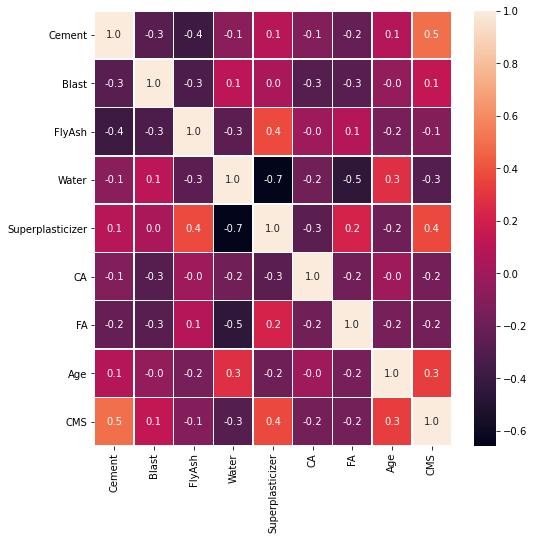

In [7]:
f,ax=plt.subplots(figsize=(8,8))
sns.heatmap(df.corr(),annot=True,linewidths=.5,fmt='.1f',ax=ax)
plt.show()

### SCATTERPLOT OF INDEPENDANT VARIABLES WITH DEPENDANT VARIABLE (CONCRETE COMPRESSIVE STRENGTH)

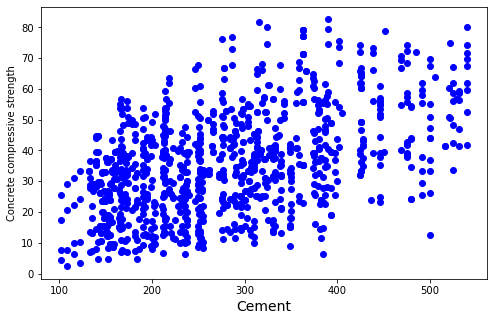

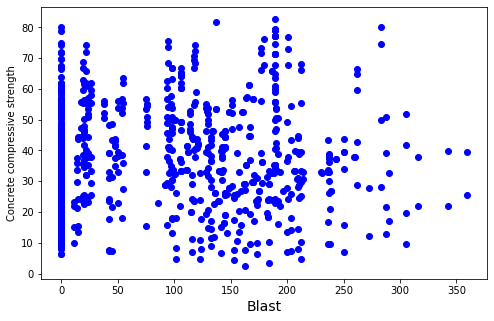

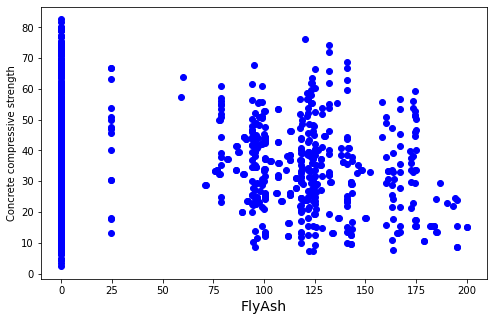

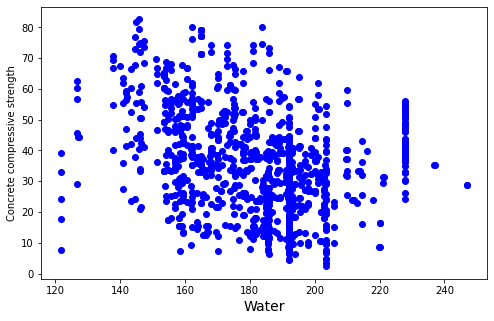

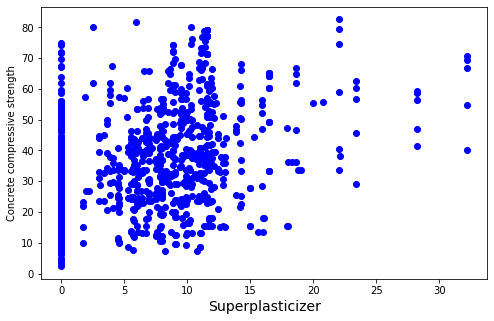

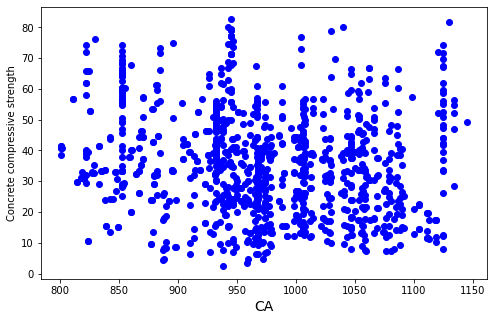

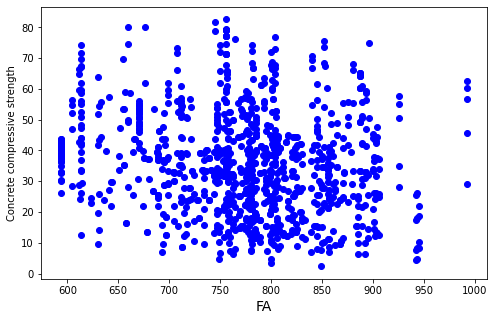

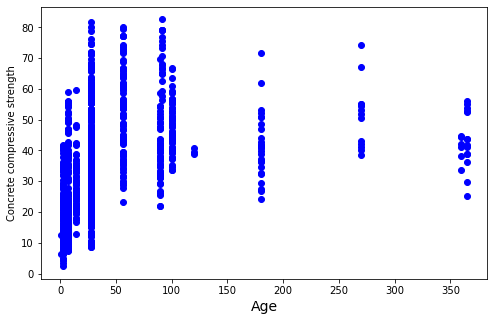

In [8]:
for v in df.columns[:-1]:   
    plt.figure(figsize = (8,5))
    plt.scatter(x=df[v],y=df['CMS'],color = 'blue')
    plt.xlabel(v,fontsize=14)
    plt.ylabel('Concrete compressive strength',fontsize=10)

## As we increase the amount of cement in the concrete then, the quality of concrete may also increase

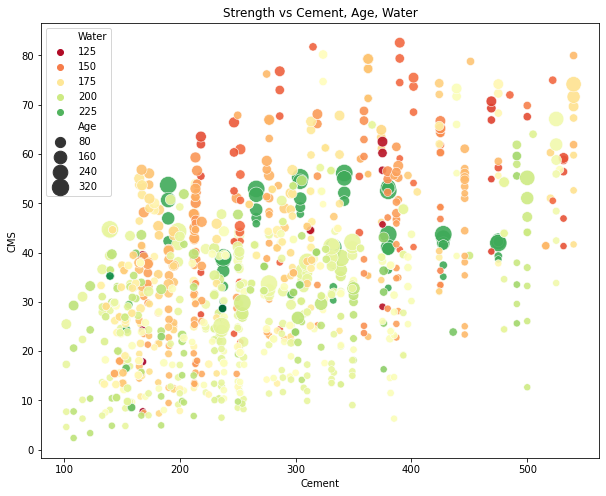

In [9]:
#Analyzing Dependent variable (Strength) vs Independent variable (cement, age and water)
fig, ax = plt.subplots(figsize=(10,8))
sns.scatterplot(y="CMS", x="Cement", hue="Water", size="Age", data=df, ax=ax, sizes=(50, 300),
palette='RdYlGn', alpha=0.9)
ax.set_title("Strength vs Cement, Age, Water")
ax.legend()
plt.show()

### OBSERVATIONS:
#### 1)Strength correlates positively with Cement
#### 2)Strength correlates with Age, though less than Cement
#### 3)Older Cement tends to require more Water, as shown by the larger green data points
#### 4)Strength correlates negatively with Water




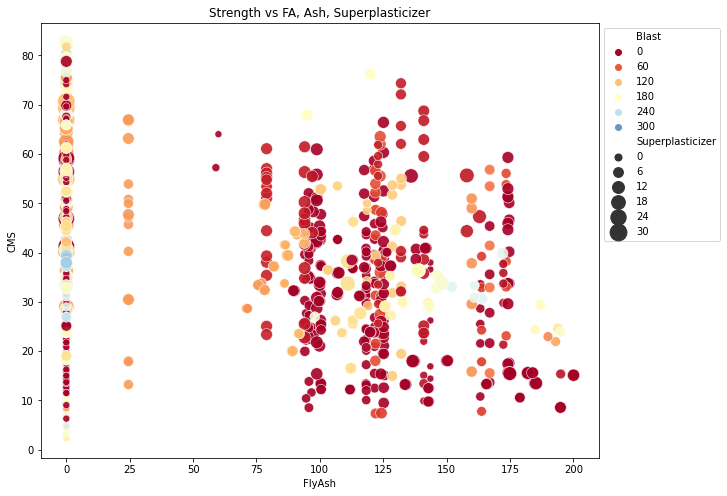

In [10]:
### Analyzing Dependent variable (Strength) vs Independent variable (FineAgg, Ash, Superplastic)
fig, ax = plt.subplots(figsize=(10,8))
sns.scatterplot(y="CMS", x="FlyAsh", hue="Blast", size="Superplasticizer", data=df, ax=ax, sizes=(50, 300),
palette='RdYlBu', alpha=0.9)
ax.set_title("Strength vs FA, Ash, Superplasticizer")
ax.legend(loc="upper left", bbox_to_anchor=(1,1)) # Moved outside the chart so it doesn't cover any data
plt.show()

#### OBSERVATIONS:
#### 1) Strength does not show any clear correlation with FlyAsh
#### 2) Strength correlates positively with superplasticizer

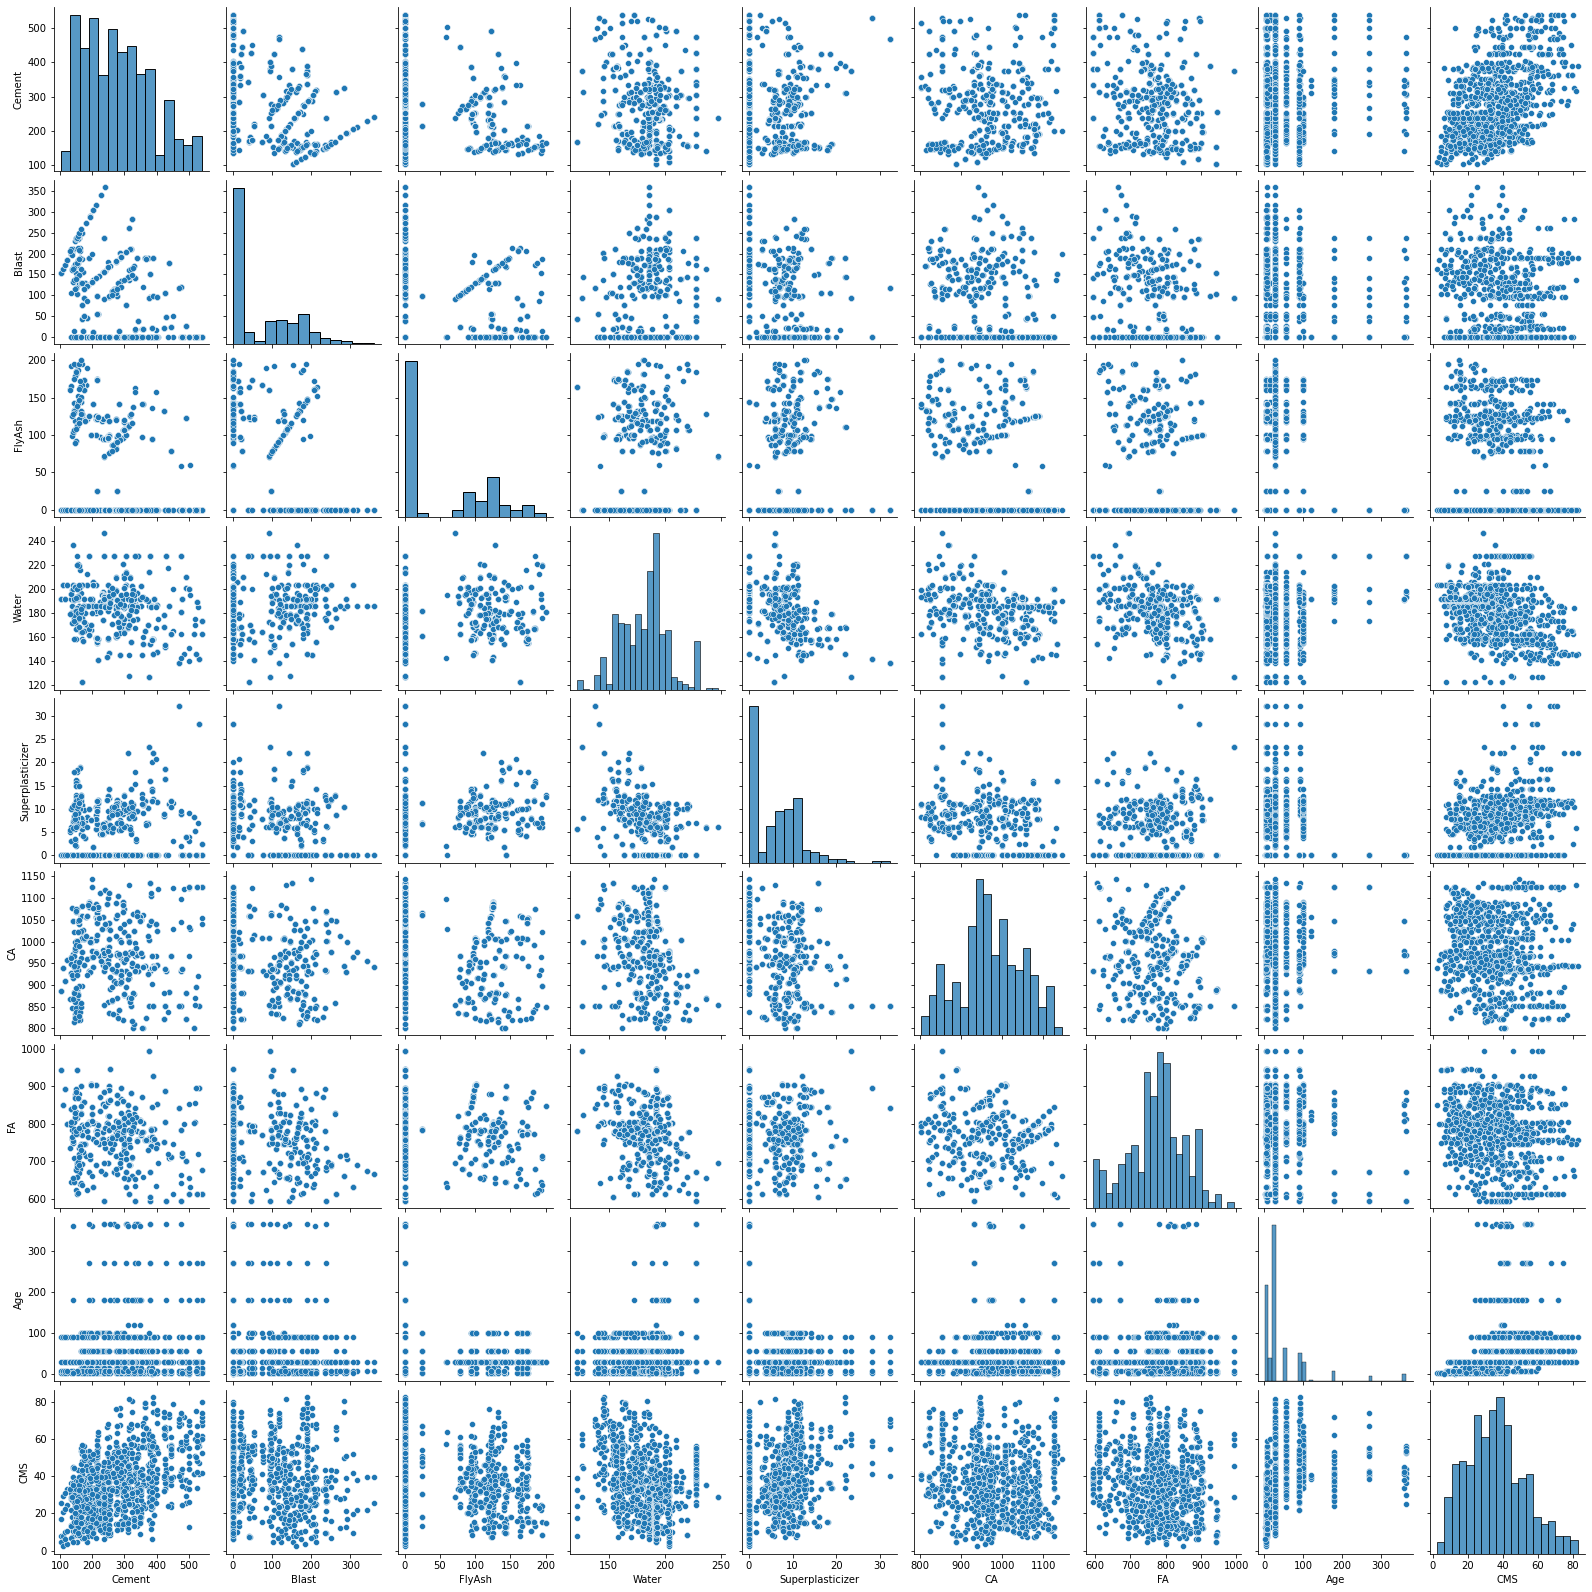

In [11]:
sns.pairplot(df)
plt.show()


# We are calculating CMS(Concrete compressive strength)  using a Multivariate/Multiple Regression Algorithm on rawdata

In [15]:
#Define x and y variable
x = df.drop('CMS',axis=1).to_numpy()
y = df['CMS'].to_numpy()

In [16]:
#Create Train and Test Datasets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

#Scale the Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train2 = sc.fit_transform(x_train)
x_test2 = sc.transform(x_test)

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics  

for name,method in [('Linear Regression', LinearRegression(n_jobs=-1))]: 
    method.fit(x_train2,y_train)
    predict = method.predict(x_test2)

print('Method: {}'.format(name))   

#Coefficents
print('\nIntercept: {:0.2f}'.format(float(method.intercept_)))
coeff_table=pd.DataFrame(np.transpose(method.coef_),df.drop('CMS',axis=1).columns,columns=['Coefficients'])
print('\n')
print(coeff_table)
    
#MAE,MSE and RMSE

print('\nR2: {:0.2f}'.format(metrics.r2_score(y_test, predict)))
print('Mean Absolute Error: {:0.2f}'.format(metrics.mean_absolute_error(y_test, predict)))  
print('Mean Squared Error: {:0.2f}'.format(metrics.mean_squared_error(y_test, predict)))  
print('Root Mean Squared Error: {:0.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, predict)))) 

Method: Linear Regression

Intercept: 35.95


                  Coefficients
Cement               13.027382
Blast                 8.952089
FlyAsh                5.955866
Water                -2.849777
Superplasticizer      1.737942
CA                    1.592146
FA                    2.035610
Age                   7.219311

R2: 0.62
Mean Absolute Error: 8.26
Mean Squared Error: 113.18
Root Mean Squared Error: 10.64


# Goodness of fit = 62%

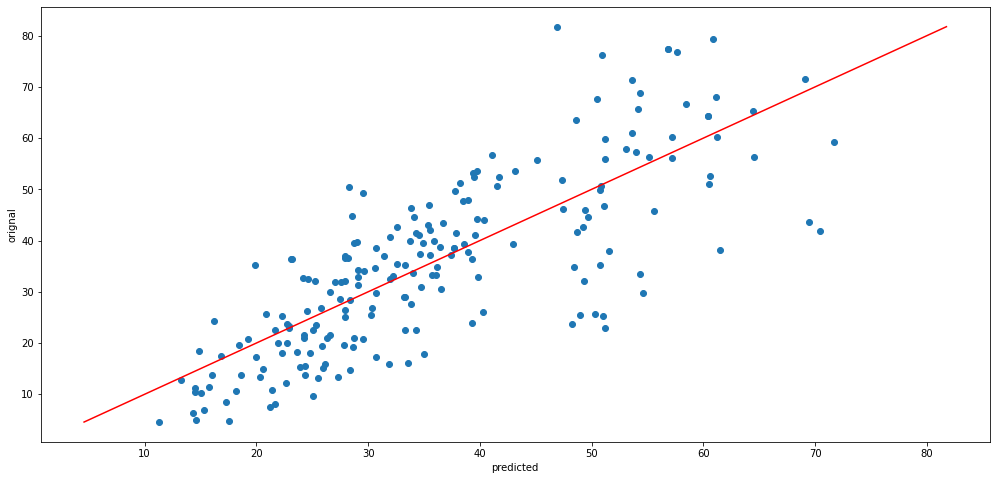

In [18]:
plt.figure(figsize=[17,8])
plt.scatter(predict,y_test)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.xlabel('predicted')
plt.ylabel('orignal')
plt.show()

### BoxPlot of Cement

<AxesSubplot:ylabel='Cement'>

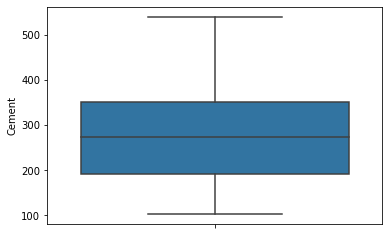

In [19]:
 sns.boxplot(y='Cement',data=df)

### There are no outliers present in Cement dataset

In [20]:
#correlation between Cement and CMS

df.corr().loc['Cement','CMS']

0.4978319193241571

### BoxPlot of Blast furnace flag

<AxesSubplot:ylabel='Blast'>

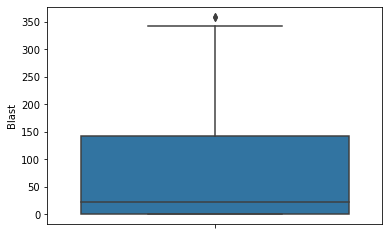

In [21]:
sns.boxplot(y='Blast',data=df)

### As per the above Boxplot, there are outliers present in Blast Furnace Slag
### We have replaced the outliers with the median using below functions

In [22]:
#calculating InterQuartile range, higher outlier and lower outliers

q1=0
q3=142.95
IQR=q3-q1
IQR
ho=q3+1.5*IQR
lo=q1-1.5*IQR
print(lo)
print(ho)

-214.42499999999998
357.375


In [23]:
df[df.Blast > ho]

,Cement,Blast,FlyAsh,Water,Superplasticizer,CA,FA,Age,CMS
553,239.6,359.4,0.0,185.7,0.0,941.6,664.3,7,25.42
559,239.6,359.4,0.0,185.7,0.0,941.6,664.3,28,39.44


In [24]:
# Calculating median of Blast furnace slag

median = float(df['Blast'].median())
median

22.0

### Masking the outlier values in Blast column with the median calculated above 

In [25]:
df["Blast"] = df["Blast"].mask(df["Blast"] > 357.375 ,median)

print("\n printing few rows from the dataset :\n",df[553:560])


 printing few rows from the dataset :
      Cement  Blast  FlyAsh  Water  Superplasticizer      CA     FA  Age    CMS
553   239.6   22.0     0.0  185.7               0.0   941.6  664.3    7  25.42
554   238.2  158.8     0.0  185.7               0.0  1040.6  734.3    7  15.69
555   181.9  272.8     0.0  185.7               0.0  1012.4  714.3   28  27.94
556   193.5  290.2     0.0  185.7               0.0   998.2  704.3   28  32.63
557   255.5  170.3     0.0  185.7               0.0  1026.6  724.3    7  17.24
558   272.8  181.9     0.0  185.7               0.0  1012.4  714.3    7  19.77
559   239.6   22.0     0.0  185.7               0.0   941.6  664.3   28  39.44


In [26]:
df[df.Blast > 357.375]

,Cement,Blast,FlyAsh,Water,Superplasticizer,CA,FA,Age,CMS


### BoxPlot of Fly Ash

<AxesSubplot:ylabel='FlyAsh'>

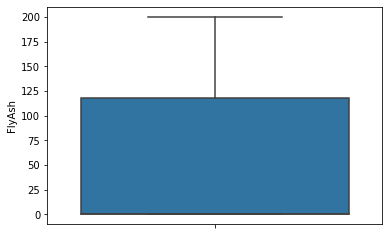

In [27]:
sns.boxplot(y='FlyAsh',data=df) 

### BoxPlot of Water

<AxesSubplot:ylabel='Water'>

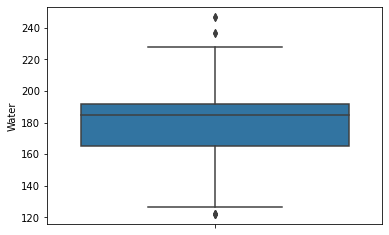

In [28]:
sns.boxplot(y='Water',data=df) 

### As per above Boxplot, there are outliers present in Water
### We have replaced the outliers with the median value

In [29]:
q1=164.9
q3=192
IQR=q3-q1
IQR
ho=q3+1.5*IQR
lo=q1-1.5*IQR
print(lo)
print(ho)

124.25000000000001
232.64999999999998


In [30]:
df[df.Water <= lo] 

,Cement,Blast,FlyAsh,Water,Superplasticizer,CA,FA,Age,CMS
224,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,3,7.75
225,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,14,17.82
226,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,28,24.24
227,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,56,32.85
228,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,100,39.23


In [31]:
x = df[df.Water > ho] 
x

,Cement,Blast,FlyAsh,Water,Superplasticizer,CA,FA,Age,CMS
862,140.0,164.0,128.0,237.0,6.0,869.0,656.0,28,35.23
873,237.0,92.0,71.0,247.0,6.0,853.0,695.0,28,28.63
936,236.9,91.7,71.5,246.9,6.0,852.9,695.4,28,28.63
1019,139.7,163.9,127.7,236.7,5.8,868.6,655.6,28,35.23


In [32]:
median = float(df['Water'].median())
median

185.0

### Masking the outlier values in water column with the median calculated above

In [33]:

#df.drop([936],inplace=True)
df["Water"] = df["Water"].mask((df["Water"] > 232.649) | (df["Water"] < 124.25) ,median)


print("\n printing few rows from the dataset :\n",df[224:229])
print("\n printing few rows from the dataset :\n",df[862:874])


 printing few rows from the dataset :
      Cement  Blast  FlyAsh  Water  Superplasticizer      CA     FA  Age    CMS
224   168.0   42.1   163.8  185.0               5.7  1058.7  780.1    3   7.75
225   168.0   42.1   163.8  185.0               5.7  1058.7  780.1   14  17.82
226   168.0   42.1   163.8  185.0               5.7  1058.7  780.1   28  24.24
227   168.0   42.1   163.8  185.0               5.7  1058.7  780.1   56  32.85
228   168.0   42.1   163.8  185.0               5.7  1058.7  780.1  100  39.23

 printing few rows from the dataset :
      Cement  Blast  FlyAsh  Water  Superplasticizer      CA     FA  Age    CMS
862   140.0  164.0   128.0  185.0               6.0   869.0  656.0   28  35.23
863   288.0  121.0     0.0  177.0               7.0   908.0  829.0   28  42.13
864   298.0    0.0   107.0  210.0              11.0   880.0  744.0   28  31.87
865   265.0  111.0    86.0  195.0               6.0   833.0  790.0   28  41.54
866   160.0  250.0     0.0  168.0              12.0

In [34]:
df[df.Water < lo] 

,Cement,Blast,FlyAsh,Water,Superplasticizer,CA,FA,Age,CMS


In [35]:
df[df.Water < lo] 

,Cement,Blast,FlyAsh,Water,Superplasticizer,CA,FA,Age,CMS


### BoxPlot of Superplasticizer

<AxesSubplot:ylabel='Superplasticizer'>

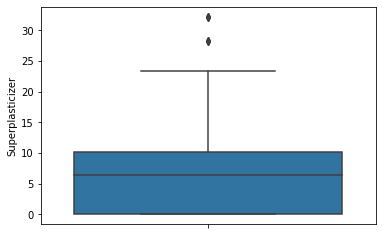

In [36]:
sns.boxplot(y='Superplasticizer',data=df) 

### There are outliers present in Superplasticizer
### Replacing the outlier values with the median 

In [37]:
q1=0
q3=10.20
IQR=q3-q1
IQR
ho=q3+1.5*IQR
lo=q1-1.5*IQR
print(lo)
print(ho)

-15.299999999999999
25.5


In [38]:
df[df.Superplasticizer < lo] 

,Cement,Blast,FlyAsh,Water,Superplasticizer,CA,FA,Age,CMS


In [39]:
df[df.Superplasticizer > ho] 

,Cement,Blast,FlyAsh,Water,Superplasticizer,CA,FA,Age,CMS
76,469.0,117.2,0.0,137.8,32.2,852.1,840.5,3,40.2
79,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.3
99,469.0,117.2,0.0,137.8,32.2,852.1,840.5,7,54.9
102,531.3,0.0,0.0,141.8,28.2,852.1,893.7,7,46.9
122,469.0,117.2,0.0,137.8,32.2,852.1,840.5,28,66.9
125,531.3,0.0,0.0,141.8,28.2,852.1,893.7,28,56.4
145,469.0,117.2,0.0,137.8,32.2,852.1,840.5,56,69.3
148,531.3,0.0,0.0,141.8,28.2,852.1,893.7,56,58.8
168,469.0,117.2,0.0,137.8,32.2,852.1,840.5,91,70.7
171,531.3,0.0,0.0,141.8,28.2,852.1,893.7,91,59.2


In [40]:
median = float(df['Superplasticizer'].median())
median

6.4

In [41]:
df["Superplasticizer"] = df["Superplasticizer"].mask((df["Superplasticizer"] > 25.5) | (df["Superplasticizer"] < -15.29) ,median)
print("\n printing few rows from the dataset :\n",df[76:172])


 printing few rows from the dataset :
      Cement  Blast  FlyAsh  Water  Superplasticizer     CA     FA  Age    CMS
76    469.0  117.2     0.0  137.8               6.4  852.1  840.5    3  40.20
77    425.0  106.3     0.0  153.5              16.5  852.1  887.1    3  33.40
78    388.6   97.1     0.0  157.9              12.1  852.1  925.7    3  28.10
79    531.3    0.0     0.0  141.8               6.4  852.1  893.7    3  41.30
80    425.0  106.3     0.0  153.5              16.5  852.1  887.1    3  33.40
..      ...    ...     ...    ...               ...    ...    ...  ...    ...
167   475.0  118.8     0.0  181.1               8.9  852.1  781.5   91  74.19
168   469.0  117.2     0.0  137.8               6.4  852.1  840.5   91  70.70
169   425.0  106.3     0.0  153.5              16.5  852.1  887.1   91  65.20
170   388.6   97.1     0.0  157.9              12.1  852.1  925.7   91  57.60
171   531.3    0.0     0.0  141.8               6.4  852.1  893.7   91  59.20

[96 rows x 9 columns]


### BoxPlot after replacing outliers with median

<AxesSubplot:ylabel='Superplasticizer'>

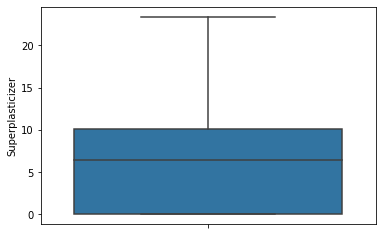

In [42]:
sns.boxplot(y='Superplasticizer',data=df) 

### BoxPlot of Coarse Aggregate

<AxesSubplot:ylabel='CA'>

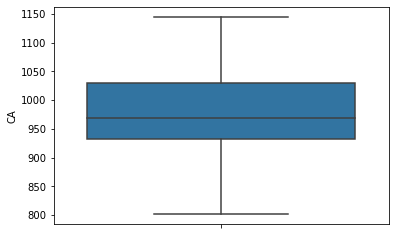

In [43]:
sns.boxplot(y='CA',data=df) 

### BoxPlot of Fine Aggregate

<AxesSubplot:ylabel='FA'>

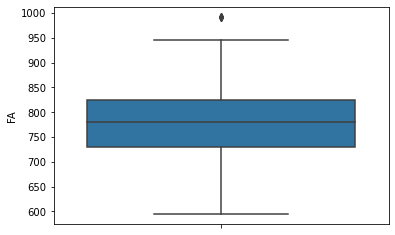

In [44]:
sns.boxplot(y='FA',data=df) 

In [45]:
df.describe()

,Cement,Blast,FlyAsh,Water,Superplasticizer,CA,FA,Age,CMS
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.240680,54.188350,181.653107,5.973592,972.918932,773.580485,45.662136,35.817961
std,104.506364,85.384419,63.997004,20.603205,5.477165,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,126.600000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.725000,118.300000,192.000000,10.075000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,342.100000,200.100000,228.000000,23.400000,1145.000000,992.600000,365.000000,82.600000


### Replacing the outlier values with the median

In [46]:
q1=730.95
q3=824.0
IQR=q3-q1
IQR
ho=q3+1.5*IQR
lo=q1-1.5*IQR
print(lo)
print(ho)

591.3750000000001
963.5749999999999


In [47]:
df[df.FA < lo] 

,Cement,Blast,FlyAsh,Water,Superplasticizer,CA,FA,Age,CMS


In [48]:
df[df.FA > ho] 

,Cement,Blast,FlyAsh,Water,Superplasticizer,CA,FA,Age,CMS
74,375.0,93.8,0.0,126.6,23.4,852.1,992.6,3,29.0
97,375.0,93.8,0.0,126.6,23.4,852.1,992.6,7,45.7
120,375.0,93.8,0.0,126.6,23.4,852.1,992.6,28,56.7
143,375.0,93.8,0.0,126.6,23.4,852.1,992.6,56,60.2
166,375.0,93.8,0.0,126.6,23.4,852.1,992.6,91,62.5


In [49]:
median = float(df['FA'].median())
median

779.5

In [50]:
df["FA"] = df["FA"].mask((df["FA"] > 963.574) ,median)

#print("\n printing few rows from the dataset :\n",df[74:121])

### BoxPlot of Age 

<AxesSubplot:ylabel='Age'>

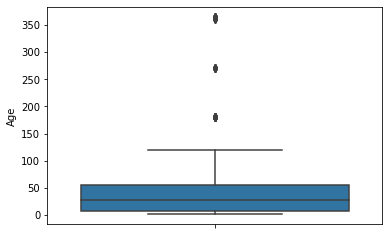

In [51]:
sns.boxplot(y='Age',data=df) 

### Histogram of Age

array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

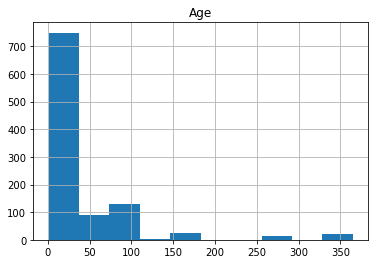

In [52]:
df.hist(column = 'Age')

### Replacing the outlier values with the median

In [53]:
q1=7
q3=56
IQR=q3-q1
IQR
ho=q3+1.5*IQR
lo=q1-1.5*IQR
print(lo)
print(ho)

-66.5
129.5


In [54]:
df[df.Age < lo] 

,Cement,Blast,FlyAsh,Water,Superplasticizer,CA,FA,Age,CMS


In [55]:
df[df.Age > ho] 

,Cement,Blast,FlyAsh,Water,Superplasticizer,CA,FA,Age,CMS
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.70
12,427.5,47.5,0.0,228.0,0.0,932.0,594.0,270,43.01
17,342.0,38.0,0.0,228.0,0.0,932.0,670.0,365,56.14
19,475.0,0.0,0.0,228.0,0.0,932.0,594.0,180,42.62
20,427.5,47.5,0.0,228.0,0.0,932.0,594.0,180,41.84
23,139.6,209.4,0.0,192.0,0.0,1047.0,806.9,180,44.21
24,380.0,0.0,0.0,228.0,0.0,932.0,670.0,365,52.52


In [56]:
median = float(df['Age'].median())
median

28.0

In [57]:
df["Age"] = df["Age"].mask((df["Age"] > 129.5) | (df["Age"] < -66.5) ,median)

print("\n printing few rows from the dataset :\n",df[2:20])


 printing few rows from the dataset :
     Cement  Blast  FlyAsh  Water  Superplasticizer      CA     FA   Age    CMS
2    332.5  142.5     0.0  228.0               0.0   932.0  594.0  28.0  40.27
3    332.5  142.5     0.0  228.0               0.0   932.0  594.0  28.0  41.05
4    198.6  132.4     0.0  192.0               0.0   978.4  825.5  28.0  44.30
5    266.0  114.0     0.0  228.0               0.0   932.0  670.0  90.0  47.03
6    380.0   95.0     0.0  228.0               0.0   932.0  594.0  28.0  43.70
7    380.0   95.0     0.0  228.0               0.0   932.0  594.0  28.0  36.45
8    266.0  114.0     0.0  228.0               0.0   932.0  670.0  28.0  45.85
9    475.0    0.0     0.0  228.0               0.0   932.0  594.0  28.0  39.29
10   198.6  132.4     0.0  192.0               0.0   978.4  825.5  90.0  38.07
11   198.6  132.4     0.0  192.0               0.0   978.4  825.5  28.0  28.02
12   427.5   47.5     0.0  228.0               0.0   932.0  594.0  28.0  43.01
13   190.0  

### BoxPlot of Concrete Compressive Strength

<AxesSubplot:ylabel='CMS'>

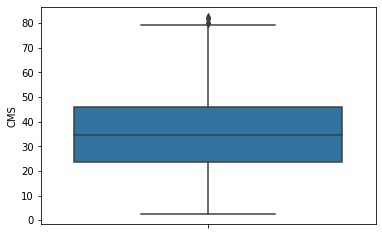

In [58]:
sns.boxplot(y='CMS',data=df) 

In [59]:
df.describe()

,Cement,Blast,FlyAsh,Water,Superplasticizer,CA,FA,Age,CMS
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.240680,54.188350,181.653107,5.973592,972.918932,772.546019,32.256311,35.817961
std,104.506364,85.384419,63.997004,20.603205,5.477165,77.753954,78.703232,27.803705,16.705742
min,102.000000,0.000000,0.000000,126.600000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.400000,28.000000,34.445000
75%,350.000000,142.725000,118.300000,192.000000,10.075000,1029.400000,822.200000,28.000000,46.135000
max,540.000000,342.100000,200.100000,228.000000,23.400000,1145.000000,945.000000,120.000000,82.600000


In [60]:
df.corr()

,Cement,Blast,FlyAsh,Water,Superplasticizer,CA,FA,Age,CMS
Cement,1.000000,-0.275046,-0.397467,-0.091614,0.013336,-0.109349,-0.238698,-0.031962,0.497832
Blast,-0.275046,1.000000,-0.320468,0.098880,0.061195,-0.283882,-0.282383,-0.028971,0.137800
FlyAsh,-0.397467,-0.320468,1.000000,-0.248011,0.447492,-0.009961,0.091729,0.057928,-0.105755
Water,-0.091614,0.098880,-0.248011,1.000000,-0.658056,-0.156928,-0.426299,-0.040304,-0.307711
Superplasticizer,0.013336,0.061195,0.447492,-0.658056,1.000000,-0.224503,0.156591,0.062013,0.346260
CA,-0.109349,-0.283882,-0.009961,-0.156928,-0.224503,1.000000,-0.161377,0.018078,-0.164935
FA,-0.238698,-0.282383,0.091729,-0.426299,0.156591,-0.161377,1.000000,0.051532,-0.182186
Age,-0.031962,-0.028971,0.057928,-0.040304,0.062013,0.018078,0.051532,1.000000,0.499850
CMS,0.497832,0.137800,-0.105755,-0.307711,0.346260,-0.164935,-0.182186,0.499850,1.000000


### CLEANSED DATA IS STORED IN FILE 'final.csv'

In [61]:
df.to_csv('final.csv')

# We are calculatiing CMS(Concrete compressive strength)  using a Multivariate/Multiple Regression Algorithm on processed data

### Dropping column Fly Ash due to weak correlation with dependant variable CMS 

In [62]:
df2 = df.drop('FlyAsh', axis = 1) 

 ### To treat Multicollinearity, We are ommiting Superplasticizer from the dataframe.
    

In [63]:
#dropping superplasticizer column instead of water to improve Goodness of fit. 
#Accuracy if water column is dropped in 71%

df3 = df2.drop('Superplasticizer', axis = 1) 

In [64]:
#Define x and y variable
x = df3.drop('CMS',axis=1).to_numpy()
y = df3['CMS'].to_numpy()

In [65]:
#Create Train and Test Datasets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

#Scale the Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train2 = sc.fit_transform(x_train)
x_test2 = sc.transform(x_test)

In [66]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics  

for name,method in [('Linear Regression', LinearRegression(n_jobs=-1))]: 
    method.fit(x_train2,y_train)
    predict = method.predict(x_test2)

print('Method: {}'.format(name))   

#Coefficents
print('\nIntercept: {:0.2f}'.format(float(method.intercept_)))
coeff_table=pd.DataFrame(np.transpose(method.coef_),df3.drop('CMS',axis=1).columns,columns=['Coefficients'])
print('\n')
print(coeff_table)
    
#MAE,MSE and RMSE
print('\nR2: {:0.2f}'.format(metrics.r2_score(y_test, predict)))
print('Mean Absolute Error: {:0.2f}'.format(metrics.mean_absolute_error(y_test, predict)))  
print('Mean Squared Error: {:0.2f}'.format(metrics.mean_squared_error(y_test, predict)))  
print('Root Mean Squared Error: {:0.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, predict)))) 

Method: Linear Regression

Intercept: 35.95


        Coefficients
Cement      7.795739
Blast       3.335736
Water      -6.435461
CA         -2.723761
FA         -3.566091
Age         8.713177

R2: 0.73
Mean Absolute Error: 6.82
Mean Squared Error: 81.54
Root Mean Squared Error: 9.03


# Goodness of fit = 73%

In [67]:
#Forecast Table
predict2 = predict.T
diff = predict2-y_test
FcstTble=pd.DataFrame({'Actual':y_test,'Predicted':predict2.round(1),'Difference':diff.round(1)})
print('\nForecast Table')
FcstTble.head()


Forecast Table


,Actual,Predicted,Difference
0,68.10,70.0,1.9
1,71.30,52.1,-19.2
2,25.18,26.7,1.5
3,19.52,20.6,1.1
4,38.02,47.4,9.4


### Residuals vs. predicting variables plots

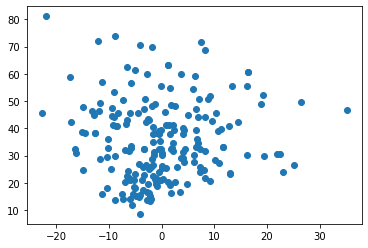

In [68]:
residuals = y_test - predict2
plt.scatter(residuals,predict2)

plt.show()

<ipython-input-69-c2127ae4b81a>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df.hist(ax = ax)


array([[<AxesSubplot:title={'center':'Cement'}>,
        <AxesSubplot:title={'center':'Blast'}>,
        <AxesSubplot:title={'center':'FlyAsh'}>],
       [<AxesSubplot:title={'center':'Water'}>,
        <AxesSubplot:title={'center':'Superplasticizer'}>,
        <AxesSubplot:title={'center':'CA'}>],
       [<AxesSubplot:title={'center':'FA'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'CMS'}>]], dtype=object)

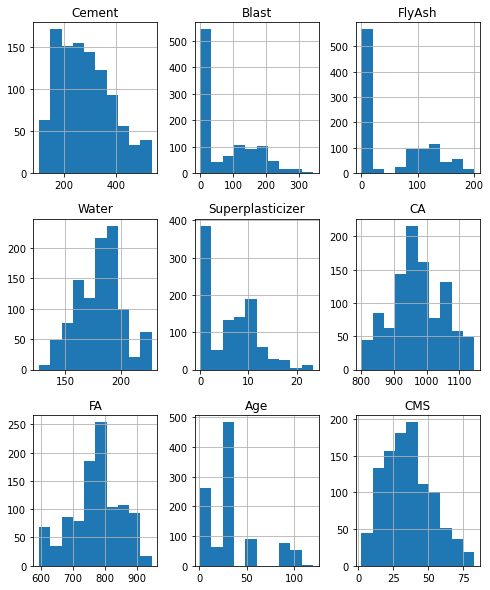

In [69]:
fig = plt.figure(figsize = (8,10))
ax = fig.gca()
df.hist(ax = ax)


In [70]:
df.corr()

,Cement,Blast,FlyAsh,Water,Superplasticizer,CA,FA,Age,CMS
Cement,1.000000,-0.275046,-0.397467,-0.091614,0.013336,-0.109349,-0.238698,-0.031962,0.497832
Blast,-0.275046,1.000000,-0.320468,0.098880,0.061195,-0.283882,-0.282383,-0.028971,0.137800
FlyAsh,-0.397467,-0.320468,1.000000,-0.248011,0.447492,-0.009961,0.091729,0.057928,-0.105755
Water,-0.091614,0.098880,-0.248011,1.000000,-0.658056,-0.156928,-0.426299,-0.040304,-0.307711
Superplasticizer,0.013336,0.061195,0.447492,-0.658056,1.000000,-0.224503,0.156591,0.062013,0.346260
CA,-0.109349,-0.283882,-0.009961,-0.156928,-0.224503,1.000000,-0.161377,0.018078,-0.164935
FA,-0.238698,-0.282383,0.091729,-0.426299,0.156591,-0.161377,1.000000,0.051532,-0.182186
Age,-0.031962,-0.028971,0.057928,-0.040304,0.062013,0.018078,0.051532,1.000000,0.499850
CMS,0.497832,0.137800,-0.105755,-0.307711,0.346260,-0.164935,-0.182186,0.499850,1.000000


### SCATTERPLOT OF DATASET

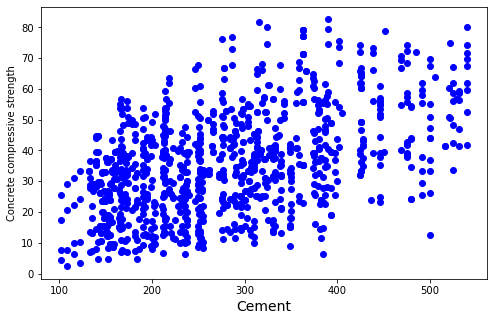

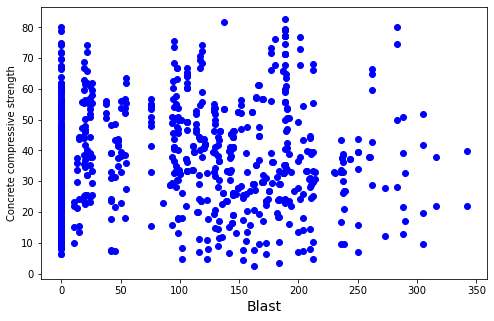

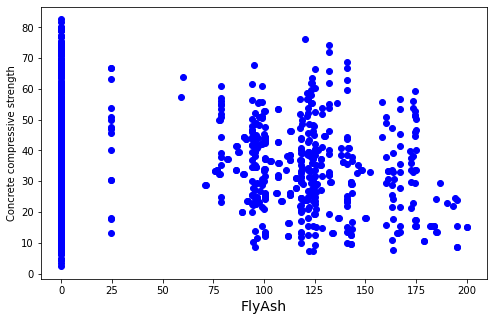

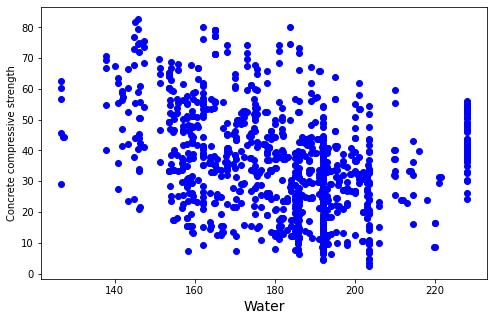

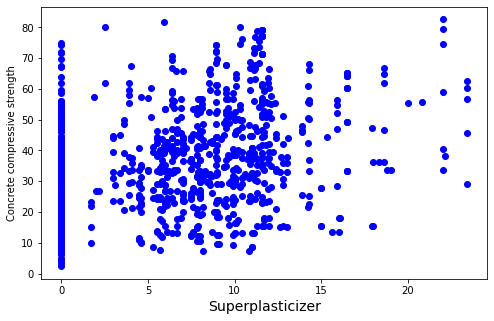

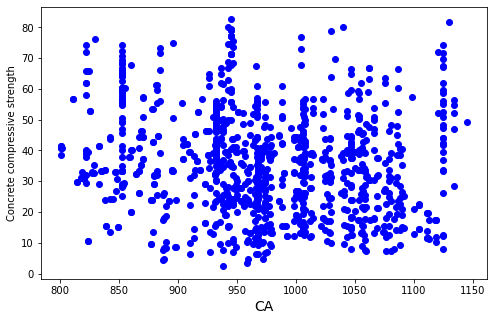

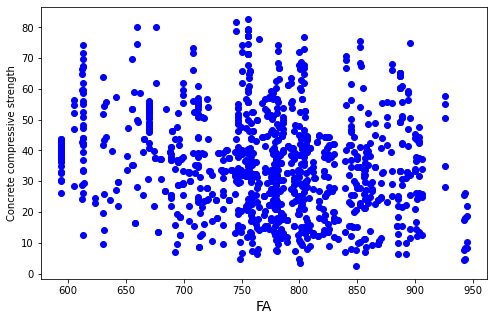

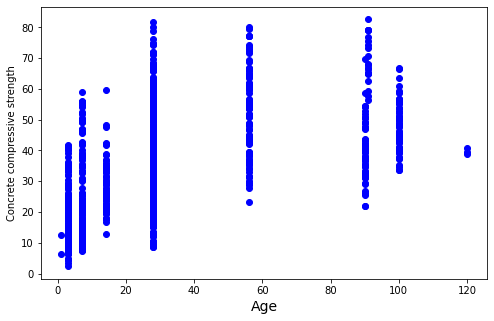

In [71]:
for v in df.columns[:-1]:
    plt.figure(figsize= (8,5))
    plt.scatter(x=df[v],y=df['CMS'],color = 'blue')
    plt.xlabel(v,fontsize=14)
    plt.ylabel('Concrete compressive strength',fontsize=10)

### BEST FIT LINE IN SCATTERPLOT

<AxesSubplot:xlabel='Cement', ylabel='CMS'>

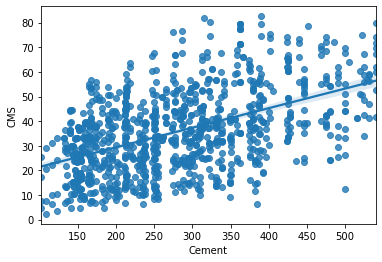

In [72]:
sns.regplot(x=("Cement"), y="CMS", data=df)

<AxesSubplot:xlabel='Blast', ylabel='CMS'>

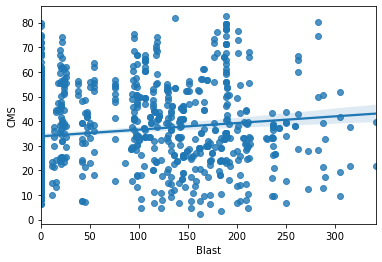

In [73]:
sns.regplot(x=("Blast"), y="CMS", data=df)

<AxesSubplot:xlabel='FlyAsh', ylabel='CMS'>

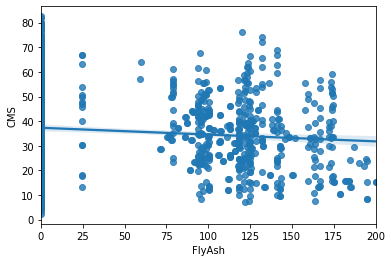

In [74]:
sns.regplot(x=("FlyAsh"), y="CMS", data=df)

<AxesSubplot:xlabel='Water', ylabel='CMS'>

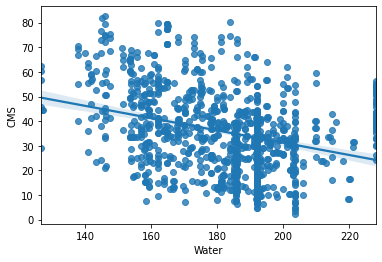

In [75]:
sns.regplot(x=("Water"), y="CMS", data=df)

<AxesSubplot:xlabel='Superplasticizer', ylabel='CMS'>

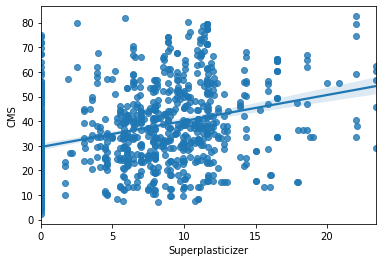

In [76]:
sns.regplot(x=("Superplasticizer"), y="CMS", data=df)

<AxesSubplot:xlabel='CA', ylabel='CMS'>

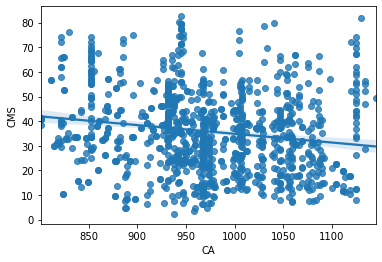

In [77]:
sns.regplot(x=("CA"), y="CMS", data=df)

<AxesSubplot:xlabel='FA', ylabel='CMS'>

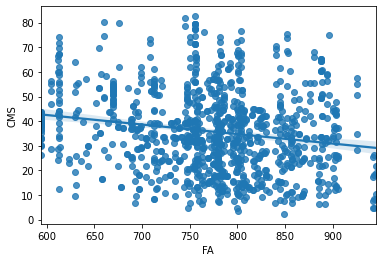

In [78]:
sns.regplot(x=("FA"), y="CMS", data=df)

<AxesSubplot:xlabel='Age', ylabel='CMS'>

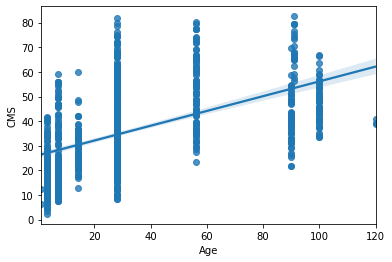

In [79]:
sns.regplot(x=("Age"), y="CMS", data=df)

## Ridge and Lasso Regression

In [84]:
# independent variables
x = df.drop(['CMS'],axis=1)
# dependent variables
y = df['CMS']

In [85]:
#Create Train and Test Datasets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

#Scale the Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train2 = sc.fit_transform(x_train)
x_test2 = sc.transform(x_test)

In [87]:
# import ridge and lasso regresion
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import mean_squared_error
rd= Ridge(alpha=0.4)
ls= Lasso(alpha=0.3)
fit_rd=rd.fit(x_train2,y_train)
fit_ls = ls.fit(x_train2,y_train)
print('R2 of Ridge:',rd.score(x_test2,y_test))
print('R2 of Lasso :',ls.score(x_test2,y_test))
print('Mean Squared Error of Ridge :',mean_squared_error(y_test,rd.predict(x_test2)))
print('Mean Squared Error of Lasso :',mean_squared_error(y_test,ls.predict(x_test2)))
print('Root Mean Squared Error of Ridge:',np.sqrt(mean_squared_error(y_test,rd.predict(x_test2))))
print('Root Mean Squared Error of Lasso:',np.sqrt(mean_squared_error(y_test,lr.predict(x_test2))))

R2 of Ridge: 0.7330725053130194
R2 of Lasso : 0.726497965304048
Mean Squared Error of Ridge : 80.03213339668679
Mean Squared Error of Lasso : 82.00335956668808
Root Mean Squared Error of Ridge: 8.946068041138899
Root Mean Squared Error of Lasso: 9.639894370219771


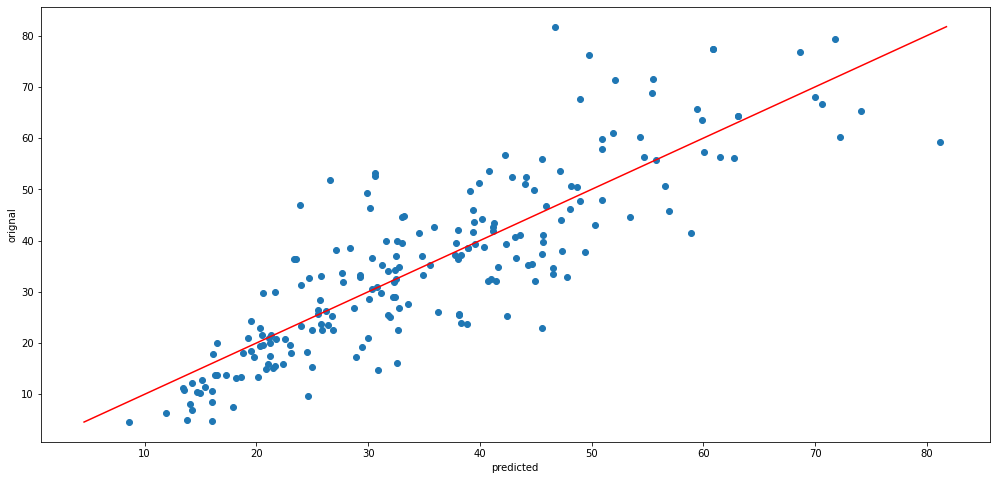

In [88]:
plt.figure(figsize=[17,8])
plt.scatter(predict,y_test)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.xlabel('predicted')
plt.ylabel('orignal')
plt.show()

## Random Forest Regression

In [89]:
# independent variables
x = df.drop(['CMS'],axis=1)
# dependent variables
y = df['CMS']

In [93]:
#Create Train and Test Datasets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

#Scale the Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train2 = sc.fit_transform(x_train)
x_test2 = sc.transform(x_test)

In [91]:
# import random forest regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
rnd= RandomForestRegressor(ccp_alpha=0.0)
val= rnd.fit(x_train2,y_train)
print('R2 :',rnd.score(x_test2,y_test))
print('Mean Squared Error : ',mean_squared_error(y_test,rnd.predict(x_test2)))
print('Root Mean Squared Error :',np.sqrt(mean_squared_error(y_test,rnd.predict(x_test2))))

R2 : 0.8797834905276011
Mean Squared Error :  36.0441839603733
Root Mean Squared Error : 6.003680867632231


# Goodness of fit = 87%

### Goodness of Fit - the ability of a model to generate high quality predictions

### Multiple Regression ( before cleaning Data)- 62%
### Multiple Regression ( after cleaning Data)- 73%
### Ridge Regression - 73%
### Lasso Regression - 72%
### Random Forest Regression - 87% 


## Random Forest Regression gives the highest accuracy which means it predicts the quality of the concrete with less error rate.  